
## Traffic Sign Recognition Classifier
---


## Step 0: Load The Data

In [42]:
###

import tensorflow as tf
import pickle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.contrib.layers import flatten

import random
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

###


# Load pickled data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print("Label Shape: {}".format(y_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Test Set:       {} samples".format(len(X_test)))
print()
print("Features Shape: {}".format(X_train.shape))
print("Labels Shape:   {}".format(y_train.shape))


Image Shape: (32, 32, 3)
Label Shape: ()

Training Set:   39209 samples
Test Set:       12630 samples

Features Shape: (39209, 32, 32, 3)
Labels Shape:   (39209,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [43]:

n_train = len(X_train)

n_test = len(X_test)

image_shape = X_train[0].shape

n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

17


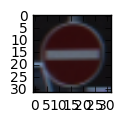

In [44]:
### Data exploration visualization.

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [45]:
### Preprocess the data.

X_train, y_train = shuffle(X_train, y_train)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

I shuffled the training data, so it is not indexed or ordered anymore to guarantee it will not affect the process of training the data 

In [47]:
### Hyperparameters
EPOCHS = 14
BATCH_SIZE = 120


keep_prob = tf.placeholder(tf.float32)

rate = 0.001
###

Number of training examples = 31367
Number of training examples = 7842


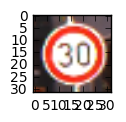

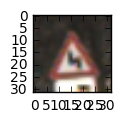

In [48]:
X_train_new, X_validation, y_train_new, y_validation = train_test_split(X_train, y_train, test_size=0.2)
print("Number of training examples =", len(X_train_new))
print("Number of training examples =", len(X_validation))

image = X_train_new[0].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image)

image = X_validation[0].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

Because there was no validation data, I splitted the training data randomly into training data (80% of the original training data) and validation data (20% of the training data)

In [49]:
### Define the architecture.

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3.
    weights1 = tf.Variable(tf.truncated_normal((5, 5, 3, 6), mu, sigma)) 
    bias1 = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, weights1, strides=[1,1,1,1], padding='VALID')
    conv1 = tf.nn.bias_add(conv1, bias1)
    
    # Activation.
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.dropout(conv1, keep_prob)
    
    # Pooling.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 2: Convolutional.
    weights2 = tf.Variable(tf.truncated_normal((5, 5, 6, 16), mu, sigma)) 
    bias2 = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, weights2, strides=[1,1,1,1], padding='VALID')
    conv2 = tf.nn.bias_add(conv2, bias2)
    
    # Activation.
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.dropout(conv2, keep_prob)

    # Pooling.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten.
    conv2 = flatten(conv2)
    
    # Layer 3: Fully Connected. 
    weights3 = tf.Variable(tf.truncated_normal((400,120), mu, sigma)) 
    bias3 = tf.Variable(tf.zeros(120))
    conv3 = tf.matmul(conv2, weights3) + bias3

    # Activation.
    conv3 = tf.nn.relu(conv3)
    conv3 = tf.nn.dropout(conv3, keep_prob)

    # Layer 4: Fully Connected. 
    weights4 = tf.Variable(tf.truncated_normal((120,80), mu, sigma)) 
    bias4 = tf.Variable(tf.zeros(80))
    conv4 = tf.matmul(conv3, weights4) + bias4
    
    # Activation.
    conv4 = tf.nn.relu(conv4)
    conv4 = tf.nn.dropout(conv4, keep_prob)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    weights5 = tf.Variable(tf.truncated_normal((80,43), mu, sigma)) 
    bias5 = tf.Variable(tf.zeros(43))
    logits = tf.matmul(conv4, weights5) + bias5
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I used the same LeNet architecture (2 conv. layers followed by 2 fullyconnected layers and an output layer)و I tried to use large weights, batchsizes and dropout of 0.5 but did not get good results, So, I used the same small weights of the original LeNet model with 1.0 dropout (= no dropout) and small batch size of 120.

In [50]:
### Train the model.

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

In [51]:
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


In [52]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss, accuracy = sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        #accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
        
    return total_loss / num_examples, total_accuracy / num_examples
    #return total_accuracy / num_examples


In [53]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_new)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_new, y_train_new = shuffle(X_train_new, y_train_new)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_new[offset:end], y_train_new[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
            
        validation_loss, validation_accuracy = evaluate(X_validation, y_validation)
        #validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Loss = {:.3f}".format(validation_loss))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, "c:\lenet")
    print("Model saved")


Training...

EPOCH 1 ...
Validation Loss = 1.263
Validation Accuracy = 0.637

EPOCH 2 ...
Validation Loss = 0.590
Validation Accuracy = 0.845

EPOCH 3 ...
Validation Loss = 0.369
Validation Accuracy = 0.903

EPOCH 4 ...
Validation Loss = 0.285
Validation Accuracy = 0.931

EPOCH 5 ...
Validation Loss = 0.260
Validation Accuracy = 0.939

EPOCH 6 ...
Validation Loss = 0.248
Validation Accuracy = 0.943

EPOCH 7 ...
Validation Loss = 0.214
Validation Accuracy = 0.950

EPOCH 8 ...
Validation Loss = 0.219
Validation Accuracy = 0.951

EPOCH 9 ...
Validation Loss = 0.231
Validation Accuracy = 0.955

EPOCH 10 ...
Validation Loss = 0.222
Validation Accuracy = 0.952

EPOCH 11 ...
Validation Loss = 0.212
Validation Accuracy = 0.955

EPOCH 12 ...
Validation Loss = 0.272
Validation Accuracy = 0.944

EPOCH 13 ...
Validation Loss = 0.340
Validation Accuracy = 0.941

EPOCH 14 ...
Validation Loss = 0.213
Validation Accuracy = 0.961

Model saved


In [56]:
#######
# Testing on the test data
#######

saver = tf.train.Saver()


with tf.Session() as sess:
    saver.restore(sess, "c:\lenet")
    print ("Model restored")

    Testing_loss, Testing_accuracy = evaluate(X_test, y_test)

    print()
    print("Testing Loss = {:.3f}".format(Testing_loss))
    print("Testing Accuracy = {:.3f}".format(Testing_accuracy))
    print()


Model restored

Testing Loss = 1.258
Testing Accuracy = 0.878



### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I tried the following alternatives :

For the optimizer I used GradientDescentOptimizer but AdamOptimizer gave better results.

For the batch size, First I used large batch size (1000) the training was slow and did not give good results, so, I decreased it untill it becomes 120.

14 epochs were the best for the training.

I tried to start with very random weight by using random_normal instead of truncated_normal but it gave worse results, so I used truncated_normal with the default LeNet mean and standard deviation.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

There is a paper menntioned earlier for Pierre Sermanet which I began with because the score in the paper was very high, but I had a lot of issues in the implementation process so I decided to use the LeNet model.
I statrted with the same LeNet parameters and begin increase/decrease the the hyperparameters (like the learning rate - batch size - keep probablility - epochs) and notice which gives the better results.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

['0.jpg', '1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg']


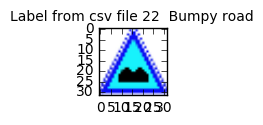

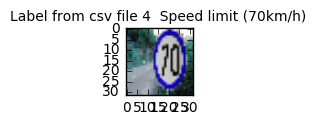

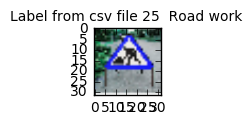

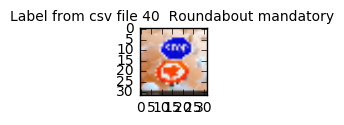

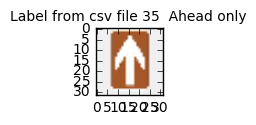

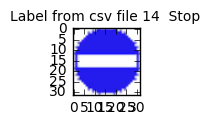

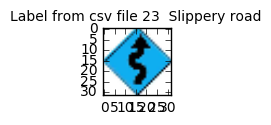

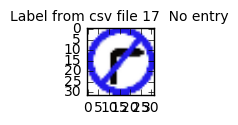

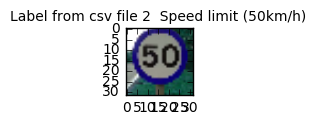

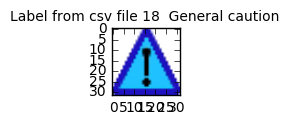

In [147]:
### Load the images and plot them.
import os
import cv2

path="my_traffic_signs"
pik="new_test.p"
my_features = []
csv_labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,
              33,34,35,36,37,38,39,40,41,42]
csv_titles = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vehicles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vehicles',
              'Vehicles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vehicles over 3.5 metric tons']

my_labels = [22,4,25,40,35,14,23,17,2,18] # valid values from the csv file
entries = {}

imgs = os.listdir(path)
print (imgs)

for img in imgs:
    img1 = cv2.imread(path + "/" + img)
    img1 = cv2.resize(img1,(32,32))
    my_features.append(img1)

entries = {'features': my_features, 'labels': my_labels} 

for i in range(0,10):
    image = entries['features'][i].squeeze()
    fig=plt.figure(figsize=(1,1))
    fig.subplots_adjust(top=0.8)
    plt.imshow(image)
    fig.suptitle("Label from csv file {}  {}".format(entries['labels'][i], csv_titles[entries['labels'][i]]))

with open(pik, "wb") as f:
    pickle.dump(entries, f)




### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**


I choosed 10 different road sign images from the internet with different conditions to test my model.

Images like (1.jpg,2.jpg,3.jpg,8.jpg) may be a little difficult to classify because of the image background.

Image (3.jpg) has 2 signs (which happens a lot in real cases) not one as we train our model, so it will be very difficult to choose which one is the one_hot_encoded.

Image (1.jpg) may be also difficult to classify becuse it is oblique (diagonal).

Other images with clean or white background, I think there will be no problem with them.

** Note : I think there should be some image manipulation before predicting them like bluring, edging ... etc.

In [62]:
### Run the predictions.
pik1="new_test.p"

with open(pik1, mode='rb') as f:
    custom_test = pickle.load(f)
    
X_custom_test, y_custom_test = custom_test['features'], custom_test['labels']
saver = tf.train.Saver()


with tf.Session() as sess:
    saver.restore(sess, "c:\lenet")
    print ("Model restored")

    Custom_Testing_loss, Custom_Testing_accuracy = evaluate(X_custom_test, y_custom_test)

    print()
    print("Custom Images Testing Loss = {:.3f}".format(Custom_Testing_loss))
    print("Custom Images Testing Accuracy = {:.3f}".format(Custom_Testing_accuracy))
    print()

Model restored

Custom Images Testing Loss = 43.586
Custom Images Testing Accuracy = 0.100



### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

Testing Accuracy = 0.878
Real World Images Testing Accuracy = 0.100

There is a big difference between the Testing Accuracy and the Real World Images Testing Accuracy, It seems that my model did not perform well in the real world captured images as it only predicts 1 right image out of 10.

Possible reasons for that may be :
- Some of the images were hard to recognize such as ones with backgrounds like trees.
- Two signs exist in one image which may be confusing which sign to choose
- Image is oblique.
- May be we need to manipulate images (bluring - edging - brighten - filtering ... etc) before  

Model restored


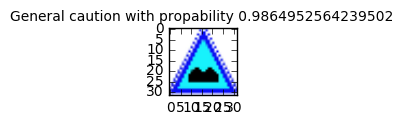

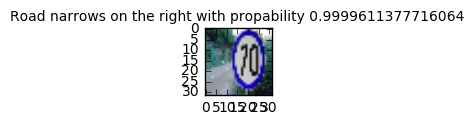

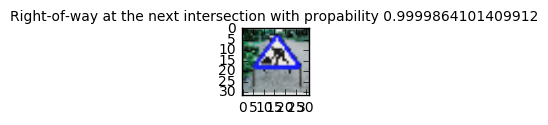

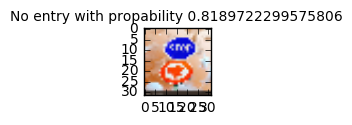

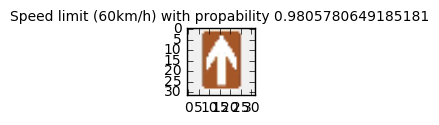

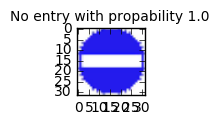

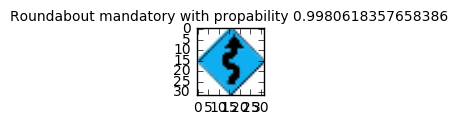

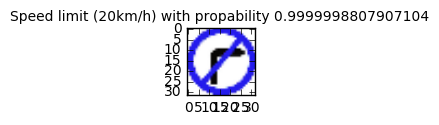

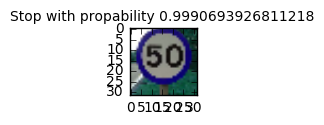

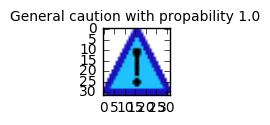

In [152]:
### Visualize the softmax probabilities.

pik1="new_test.p"

with open(pik1, mode='rb') as f:
    custom_test = pickle.load(f)
    
X_custom_test, y_custom_test = custom_test['features'], custom_test['labels']
softmax = tf.nn.softmax(logits)
softmax = tf.nn.top_k(softmax, k=1)

saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, "c:\lenet")
    print ("Model restored")
    output = sess.run(softmax, feed_dict={x:X_custom_test, y: y_custom_test, keep_prob: 1.0})

for i in range(10):
    image = X_custom_test[i].squeeze()
    fig = plt.figure(figsize=(1,1))
    fig.subplots_adjust(top=0.7)

    plt.imshow(image)
    
    try:
        fig.suptitle(csv_titles[output[1][i][0]] + " with propability {}".format(output[0][i][0])
                    + csv_titles[]
                    )
    except:
        fig.suptitle("value not found")


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

Model restored


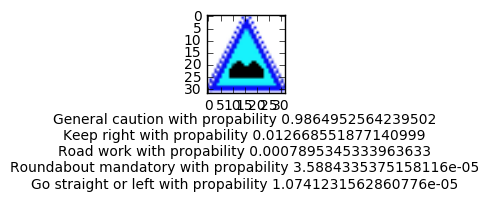

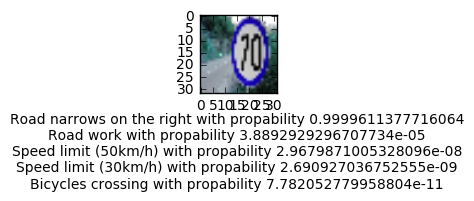

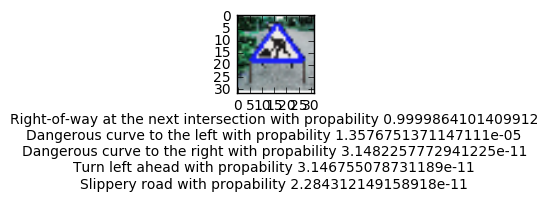

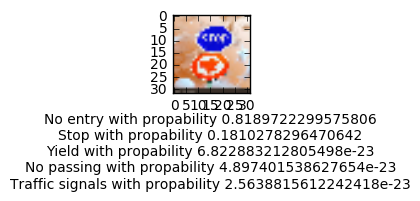

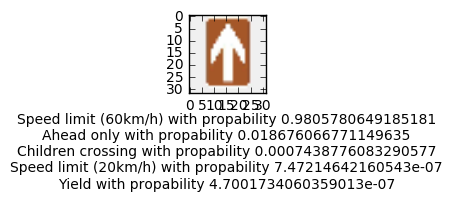

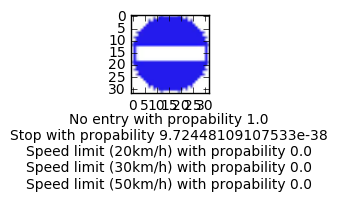

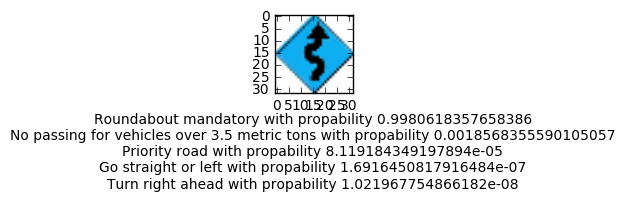

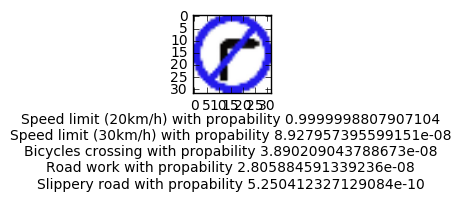

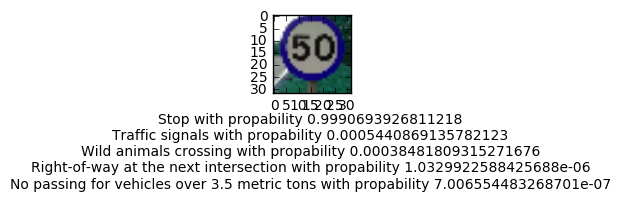

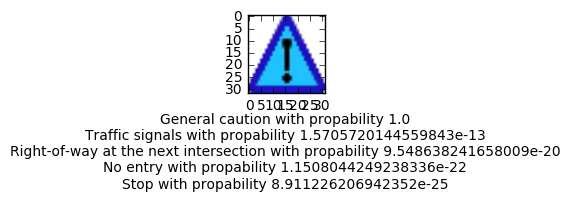

In [173]:
### Visualize the softmax probabilities.

pik1="new_test.p"

with open(pik1, mode='rb') as f:
    custom_test = pickle.load(f)
    
X_custom_test, y_custom_test = custom_test['features'], custom_test['labels']
softmax = tf.nn.softmax(logits)
softmax = tf.nn.top_k(softmax, k=5)

saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, "c:\lenet")
    print ("Model restored")
    output = sess.run(softmax, feed_dict={x:X_custom_test, y: y_custom_test, keep_prob: 1.0})

for i in range(10):
    image = X_custom_test[i].squeeze()
    fig = plt.figure(figsize=(1,1))
    fig.subplots_adjust(top=3.0)

    plt.imshow(image)
    
    try:
        fig.suptitle(csv_titles[output[1][i][0]] + " with propability {}".format(output[0][i][0]) + "\n" +
        csv_titles[output[1][i][1]] + " with propability {}".format(output[0][i][1]) + "\n" +
        csv_titles[output[1][i][2]] + " with propability {}".format(output[0][i][2]) + "\n" +
        csv_titles[output[1][i][3]] + " with propability {}".format(output[0][i][3]) + "\n" +
        csv_titles[output[1][i][4]] + " with propability {}".format(output[0][i][4]))
    except:
        fig.suptitle("value not found")

**Answer:**

After getting the best five predictions the results:

Image like bumpy road and road work is not recognized at all

Image like (speed limit 70 km/h) has near result as it gets (speed limit 50 km/h - and - speed limit 30 km/h)

Other images have the correct answer in one of the best five predictions, even the images with 2 signs has one correct prediction of one of them (Stop)

Funny thing about the image with 2 signs that one of the predictions was it is a traffic sign


** Note **
The model is saved in a folder called model - because throw the implementation I used to put it in my C: drive as I use Windows OS

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.